In [16]:
import utils.mnist_reader as mnist_reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

seed = 0
np.random.seed(seed)

import warnings
from sklearn.exceptions import ConvergenceWarning

# Disable ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [3]:
seed = 0
np.random.seed(seed)

In [4]:
X, y = mnist_reader.load_mnist('data/fashion', kind='train')
X_te, y_te = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [5]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=True)

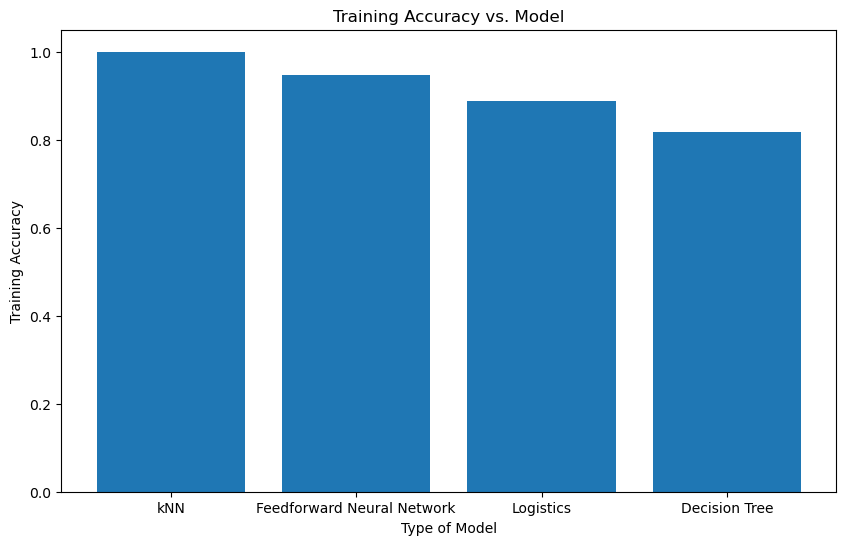

In [10]:
bar_x = ['kNN', 'Feedforward Neural Network', 'Logistics', 'Decision Tree']
bar_y = [1.0, 0.9470444444444445, 0.8875777777777778, 0.8171777777777778]

plt.figure(figsize=(10, 6))
plt.bar(bar_x, bar_y)

plt.xlabel('Type of Model')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Model')

plt.show()

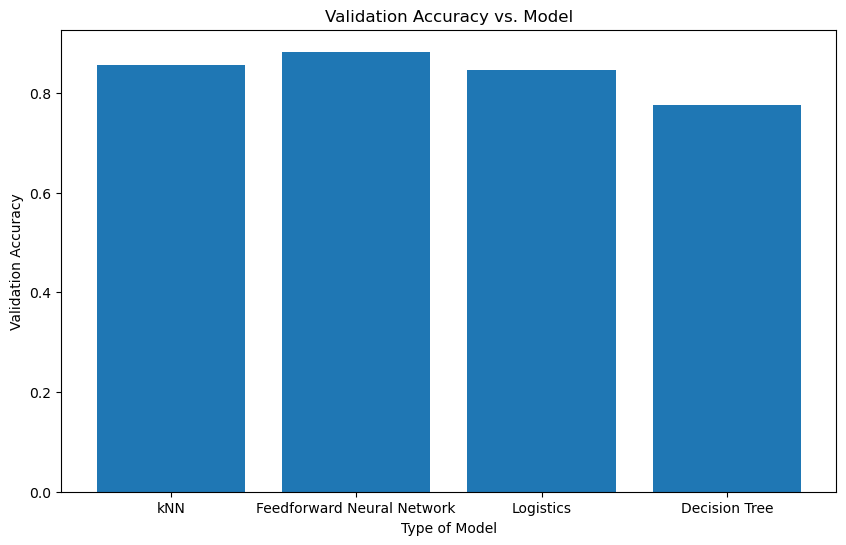

In [11]:
bar_x = ['kNN', 'Feedforward Neural Network', 'Logistics', 'Decision Tree']
bar_y = [0.8556666666666667, 0.8828, 0.8468666666666667, 0.7768]

plt.figure(figsize=(10, 6))
plt.bar(bar_x, bar_y)

plt.xlabel('Type of Model')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Model')

plt.show()

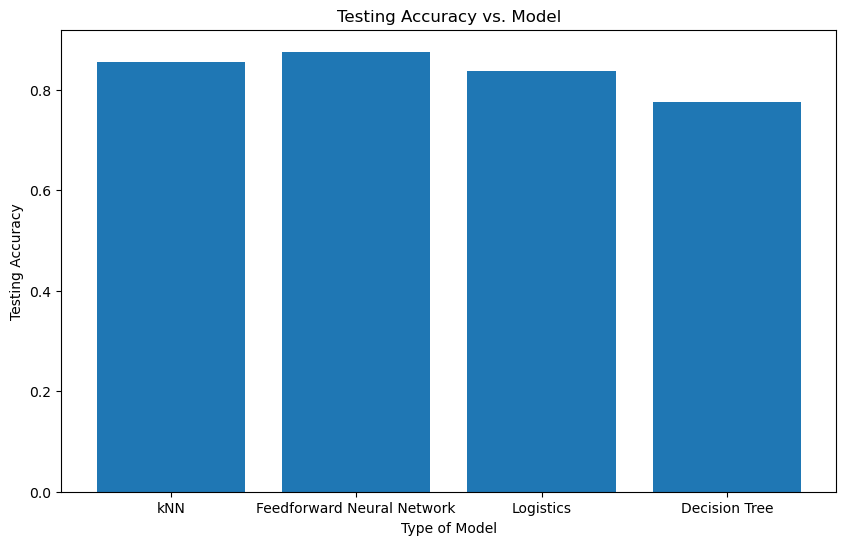

In [12]:
bar_x = ['kNN', 'Feedforward Neural Network', 'Logistics', 'Decision Tree']
bar_y = [0.8563, 0.8758, 0.8367, 0.7759]

plt.figure(figsize=(10, 6))
plt.bar(bar_x, bar_y)

plt.xlabel('Type of Model')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. Model')

plt.show()

In [13]:
n_tr = [100, 1000, 5000, 10000, 20000, 45000]

clf_tr_errors = []
clf_te_errors = []
mlp_tr_errors = []
mlp_te_errors = []
log_tr_errors = []
log_te_errors = []
dt_tr_errors = []
dt_te_errors = []

In [17]:
for n in n_tr:
    clf = KNeighborsClassifier(leaf_size=25, n_neighbors=9, p=1, weights='distance', n_jobs=-1)
    clf.fit(X_tr[:n], y_tr[:n])
    mlp = MLPClassifier(random_state=seed, activation='relu', alpha=0.0001, hidden_layer_sizes=(50,), solver='sgd')
    mlp.fit(X_tr[:n], y_tr[:n])
    log = LogisticRegression(random_state=seed, C=10, max_iter=100, penalty='l2', n_jobs=-1)
    log.fit(X_tr[:n], y_tr[:n])
    dt = DecisionTreeClassifier(random_state=seed, max_depth=10, max_features='sqrt', min_samples_leaf=2, n_jobs=-1)
    dt.fit(X_tr[:n], y_tr[:n])

    # compute training error and testing error
    y_clf_tr_pred = clf.predict(X_tr[:n])
    y_mlp_tr_pred = mlp.predict(X_tr[:n])
    y_log_tr_pred = log.predict(X_tr[:n])
    y_dt_tr_pred = dt.predict(X_tr[:n])
    clf_tr_errors.append(1 - accuracy_score(y_tr[:n], y_clf_tr_pred))
    mlp_tr_errors.append(1 - accuracy_score(y_tr[:n], y_mlp_tr_pred))
    log_tr_errors.append(1 - accuracy_score(y_tr[:n], y_log_tr_pred))
    dt_tr_errors.append(1 - accuracy_score(y_tr[:n], y_dt_tr_pred))

    y_clf_te_pred = clf.predict(X_te)
    y_mlp_te_pred = mlp.predict(X_te)
    y_log_te_pred = log.predict(X_te)
    y_dt_te_pred = dt.predict(X_te)
    clf_te_errors.append(1 - accuracy_score(y_te, y_clf_te_pred))
    mlp_te_errors.append(1 - accuracy_score(y_te, y_mlp_te_pred))
    log_te_errors.append(1 - accuracy_score(y_te, y_log_te_pred))
    dt_te_errors.append(1 - accuracy_score(y_te, y_dt_te_pred))

plt.figure()
plt.plot(n_tr, clf_tr_errors, 'o-', label='kNN Training', color='blue')
plt.plot(n_tr, clf_te_errors, 'o--', label='kNN Testing', color='blue', linestyle='dashed')
plt.plot(n_tr, mlp_tr_errors, 'o-', label='FNN Training', color='red')
plt.plot(n_tr, mlp_te_errors, 'o--', label='FNN Testing', color='red', linestyle='dashed')
plt.plot(n_tr, log_tr_errors, 'o-', label='Logistic Training', color='green')
plt.plot(n_tr, log_te_errors, 'o--', label='Logistic Testing', color='green', linestyle='dashed')
plt.plot(n_tr, dt_tr_errors, 'o-', label='DT Training', color='magenta')
plt.plot(n_tr, dt_te_errors, 'o--', label='DT Testing', color='magenta', linestyle='dashed')

plt.xlabel('Number of Training Data Points')
plt.ylabel('Error Rate')
plt.xscale('log')
plt.title('Relation Between Amount Of Training Data and Error Rate')

plt.legend()
plt.show()


/Users/rail_hu/miniconda3/envs/cs178/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'n_jobs'